In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Preprocessed.csv")
df

,CustomerID,Customer_Lifetime_Value,Coverage,Education,EmploymentStatus,Gender,Income,Location_Geo,Location_Code,Marital_Status,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,177777,Urban,Married,...,33,0,2,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2
1,2057,8005.964669,Basic,College,Employed,M,63357.0,288766,Suburban,Married,...,42,0,5,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,216884,Urban,Married,...,44,0,3,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1
3,1801,9294.088719,Basic,College,Employed,M,67544.0,19725,Suburban,Married,...,15,0,3,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,191747,Suburban,Married,...,68,0,5,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,3735,20496.694260,Basic,High School or Below,Unemployed,F,0.0,127794,Suburban,Single,...,72,0,2,Personal Auto,Personal L2,Offer1,Branch,307.200000,Four-Door Car,2
9802,5988,2592.437797,Basic,High School or Below,Employed,M,72421.0,186723,Suburban,Married,...,23,0,1,Corporate Auto,Corporate L3,Offer2,Call Center,312.000000,Four-Door Car,3
9803,8767,3103.923041,Extended,College,Employed,F,74665.0,192747,Urban,Married,...,90,2,1,Corporate Auto,Corporate L2,Offer2,Call Center,236.902001,Four-Door Car,2
9804,9900,9161.655119,Basic,High School or Below,Employed,F,91763.0,195739,Urban,Married,...,64,0,3,Special Auto,Special L3,Offer1,Call Center,441.992043,SUV,3


In [3]:
df.isna().sum()

CustomerID                         0
Customer_Lifetime_Value            0
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                           118
Location_Geo                       0
Location_Code                      0
Marital_Status                     0
Monthly_Premium_Auto               0
Months_Since_Last_Claim            0
Months_Since_Policy_Inception      0
Number_of_Open_Complaints          0
Number_of_Policies                 0
Policy_Type                        0
Policy                             0
Renew_Offer_Type                   0
Sales_Channel                      0
Total_Claim_Amount                 0
Vehicle_Class                      0
Vehicle_Size                       0
dtype: int64

In [4]:
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002362CE814C8>,
      dtype=object)

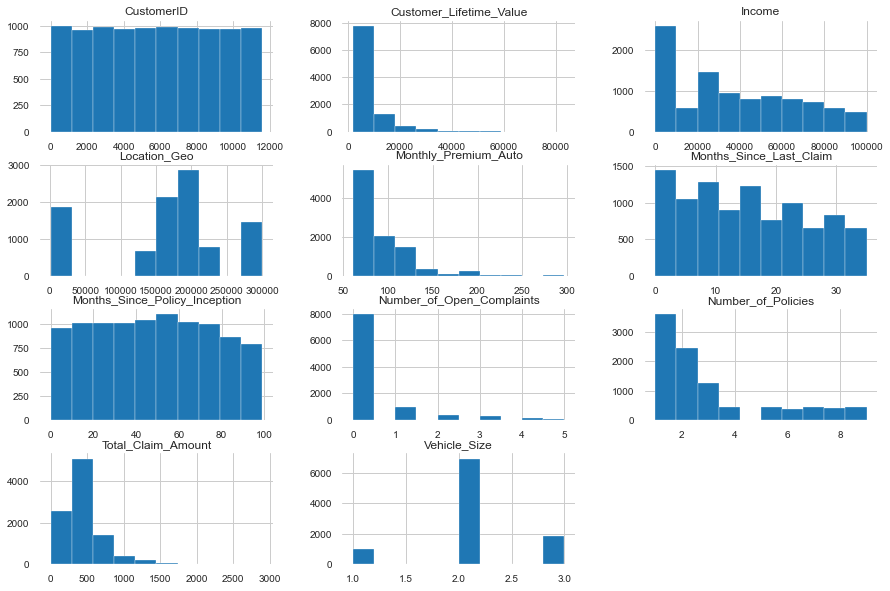

In [5]:
plt.rcParams["figure.figsize"] = 15,10
df.hist()

In [6]:
def outlier(x):
    high=0
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high += q3+1.5*iqr
    outlier = (x.loc[(x < low) | (x > high)])
    return(outlier)

In [7]:
q1 =df['Customer_Lifetime_Value'].quantile(.25)
q3 = df['Customer_Lifetime_Value'].quantile(.75)
iqr = q3-q1

In [8]:
df_out = df[~((df['Customer_Lifetime_Value'] < (q1 - 1.5 *iqr))  |  (df['Customer_Lifetime_Value'] > (q3+ 1.5 * iqr)))]
df_out

,CustomerID,Customer_Lifetime_Value,Coverage,Education,EmploymentStatus,Gender,Income,Location_Geo,Location_Code,Marital_Status,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,177777,Urban,Married,...,33,0,2,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2
1,2057,8005.964669,Basic,College,Employed,M,63357.0,288766,Suburban,Married,...,42,0,5,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,216884,Urban,Married,...,44,0,3,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1
3,1801,9294.088719,Basic,College,Employed,M,67544.0,19725,Suburban,Married,...,15,0,3,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,191747,Suburban,Married,...,68,0,5,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,10928,5116.624022,Basic,High School or Below,Employed,F,26173.0,283776,Suburban,Single,...,10,1,9,Corporate Auto,Corporate L1,Offer2,Web,449.819671,Four-Door Car,2
9802,5988,2592.437797,Basic,High School or Below,Employed,M,72421.0,186723,Suburban,Married,...,23,0,1,Corporate Auto,Corporate L3,Offer2,Call Center,312.000000,Four-Door Car,3
9803,8767,3103.923041,Extended,College,Employed,F,74665.0,192747,Urban,Married,...,90,2,1,Corporate Auto,Corporate L2,Offer2,Call Center,236.902001,Four-Door Car,2
9804,9900,9161.655119,Basic,High School or Below,Employed,F,91763.0,195739,Urban,Married,...,64,0,3,Special Auto,Special L3,Offer1,Call Center,441.992043,SUV,3


In [9]:
cat_var = [var for var in df_out.columns if df_out[var].dtypes == "object"]
cat_var = df_out[cat_var]
cat_var

,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class
0,Basic,Bachelor,Unemployed,F,Urban,Married,Personal Auto,Personal L2,Offer2,Branch,Four-Door Car
1,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,SUV
2,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L1,Offer2,Branch,SUV
3,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Branch,SUV
4,Basic,Bachelor,Retired,F,Suburban,Married,Personal Auto,Personal L1,Offer2,Web,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
9800,Basic,High School or Below,Employed,F,Suburban,Single,Corporate Auto,Corporate L1,Offer2,Web,Four-Door Car
9802,Basic,High School or Below,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Call Center,Four-Door Car
9803,Extended,College,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Call Center,Four-Door Car
9804,Basic,High School or Below,Employed,F,Urban,Married,Special Auto,Special L3,Offer1,Call Center,SUV


In [10]:
for var in cat_var.columns:
    print("==========================")
    print(cat_var[var].value_counts())

Basic       5785
Extended    2414
Premium      724
Name: Coverage, dtype: int64
Bachelor                2789
College                 2616
High School or Below    2514
Master                   683
Doctor                   321
Name: Education, dtype: int64
Employed         5575
Unemployed       2244
Medical Leave     450
Disabled          392
Retired           262
Name: EmploymentStatus, dtype: int64
F    4624
M    4299
Name: Gender, dtype: int64
Suburban    5732
Rural       1652
Urban       1539
Name: Location_Code, dtype: int64
Married     5267
Single      2373
Divorced    1283
Name: Marital_Status, dtype: int64
Personal Auto     6850
Corporate Auto    1738
Special Auto       335
Name: Policy_Type, dtype: int64
Personal L3     3428
Personal L2     2061
Personal L1     1172
Corporate L3     969
Corporate L2     563
Corporate L1     362
Special L2       173
Special L3       140
Special L1        55
Name: Policy, dtype: int64
Offer1    3697
Offer2    2827
Offer3    1396
Offer4    1003
Nam

In [11]:
def encode_Coverage(Coverage):
    if Coverage == "Basic":
        return 1
    elif Coverage == "Extended":
        return 2
    elif Coverage == "Premium":
        return 3
cat_var['Coverage'] = cat_var['Coverage'].apply(encode_Coverage)

In [12]:
def encode_Education(Education):
    if Education == "Bachelor":
        return 2
    elif Education == "College":
        return 2
    elif Education == "High School or Below":
        return 1
    elif Education == "Master":
        return 3
    elif Education == "Doctor":
        return 4
cat_var['Education'] = cat_var['Education'].apply(encode_Education)

In [13]:
def encode_EmploymentStatus(EmploymentStatus):
    if EmploymentStatus == "Employed":
        return 5
    elif EmploymentStatus == "Unemployed":
        return 4
    elif EmploymentStatus == "Medical Leave":
        return 3
    elif EmploymentStatus == "Disabled":
        return 2
    elif EmploymentStatus == "Retired":
        return 1
cat_var['EmploymentStatus'] = cat_var['EmploymentStatus'].apply(encode_EmploymentStatus)
#

In [14]:
def encode_Policy(Policy):
    if Policy == "Personal L3":
        return 2
    elif Policy == "Personal L2":
        return 2
    elif Policy == "Personal L1":
        return 2
    elif Policy == "Corporate L3":
        return 3
    elif Policy == "Corporate L2":
        return 3
    elif Policy == "Corporate L1":
        return 3
    elif Policy == "Special L2":
        return 1
    elif Policy == "Special L3":
        return 1
    elif Policy == "Special L1":
        return 1
cat_var['Policy'] = cat_var['Policy'].apply(encode_Policy)

In [15]:
def encode_Location_Code(Location_Code):
    if Location_Code == "Suburban":
        return 3
    elif Location_Code == "Rural":
        return 2
    elif Location_Code == "Urban":
        return 1
cat_var['Location_Code'] = cat_var['Location_Code'].apply(encode_Location_Code)
#

In [16]:
cat_var['Location_Code'] = pd.get_dummies(cat_var['Location_Code'])

In [17]:
cat_var['Gender'] = pd.get_dummies(cat_var['Gender'])

In [18]:
cat_var['Marital_Status'] = pd.get_dummies(cat_var['Marital_Status'])

In [19]:
# def encode_Marital_Status(Marital_Status):
#     if Marital_Status == "Married":
#         return 3
#     elif Marital_Status == "Single":
#         return 2
#     elif Marital_Status == "Divorced":
#         return 1
# cat_var['Marital_Status'] = cat_var['Marital_Status'].apply(encode_Marital_Status)

In [20]:
def encode_Renew_Offer_Type(Renew_Offer_Type):
    if Renew_Offer_Type == "Offer1":
        return 4
    elif Renew_Offer_Type == "Offer2":
        return 3
    elif Renew_Offer_Type == "Offer3":
        return 2
    elif Renew_Offer_Type == "Offer4":
        return 1
cat_var['Renew_Offer_Type'] = cat_var['Renew_Offer_Type'].apply(encode_Renew_Offer_Type)

In [21]:
def encode_Sales_Channel(Sales_Channel):
    if Sales_Channel == "Agent":
        return 4
    elif Sales_Channel == "Branch":
        return 3
    elif Sales_Channel == "Call Center":
        return 2
    elif Sales_Channel == "Web":
        return 1
cat_var['Sales_Channel'] = cat_var['Sales_Channel'].apply(encode_Sales_Channel)

In [22]:
def encode_Vehicle_Class(Vehicle_Class):
    if Vehicle_Class == "Four-Door Car":
        return 6
    elif Vehicle_Class == "Two-Door Car":
        return 5
    elif Vehicle_Class == "SUV":
        return 4
    elif Vehicle_Class == "Sports Car":
        return 3
    elif Vehicle_Class == "Luxury SUV":
        return 2
    elif Vehicle_Class == "Luxury Car":
        return 1
cat_var['Vehicle_Class'] = cat_var['Vehicle_Class'].apply(encode_Vehicle_Class)

In [23]:
def encode_Policy_Type(Policy_Type):
    if Policy_Type == "Personal Auto":
        return 2
    elif Policy_Type == "Corporate Auto":
        return 3
    elif Policy_Type == "Special Auto":
        return 1
cat_var['Policy_Type'] = cat_var['Policy_Type'].apply(encode_Policy_Type)

In [24]:
num_var = [var for var in df_out.columns if df_out[var].dtypes != "object"]
num_var = df_out[num_var]
num_var

,CustomerID,Customer_Lifetime_Value,Income,Location_Geo,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size
0,5917,7824.372789,0.0,177777,67,2,33,0,2,267.214383,2
1,2057,8005.964669,63357.0,288766,101,26,42,0,5,565.508572,2
2,4119,8646.504109,64125.0,216884,108,3,44,0,3,369.818708,1
3,1801,9294.088719,67544.0,19725,116,2,15,0,3,556.800000,3
4,9618,5595.971365,19651.0,191747,72,3,68,0,5,345.600000,3
...,...,...,...,...,...,...,...,...,...,...,...
9800,10928,5116.624022,26173.0,283776,68,2,10,1,9,449.819671,2
9802,5988,2592.437797,72421.0,186723,65,8,23,0,1,312.000000,3
9803,8767,3103.923041,74665.0,192747,78,10,90,2,1,236.902001,2
9804,9900,9161.655119,91763.0,195739,113,22,64,0,3,441.992043,3


In [25]:
df_new = pd.concat([num_var,cat_var],axis=1)
df_new

,CustomerID,Customer_Lifetime_Value,Income,Location_Geo,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,...,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class
0,5917,7824.372789,0.0,177777,67,2,33,0,2,267.214383,...,2,4,1,1,0,2,2,3,3,6
1,2057,8005.964669,63357.0,288766,101,26,42,0,5,565.508572,...,2,5,0,0,0,2,2,3,4,4
2,4119,8646.504109,64125.0,216884,108,3,44,0,3,369.818708,...,1,5,1,1,0,2,2,3,3,4
3,1801,9294.088719,67544.0,19725,116,2,15,0,3,556.800000,...,2,5,0,0,0,3,3,4,3,4
4,9618,5595.971365,19651.0,191747,72,3,68,0,5,345.600000,...,2,1,1,0,0,2,2,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,10928,5116.624022,26173.0,283776,68,2,10,1,9,449.819671,...,1,5,1,0,0,3,3,3,1,6
9802,5988,2592.437797,72421.0,186723,65,8,23,0,1,312.000000,...,1,5,0,0,0,3,3,3,2,6
9803,8767,3103.923041,74665.0,192747,78,10,90,2,1,236.902001,...,2,5,1,1,0,3,3,3,2,6
9804,9900,9161.655119,91763.0,195739,113,22,64,0,3,441.992043,...,1,5,1,1,0,1,1,4,2,4


In [26]:
# mean_encode = df_new.groupby('Income')['Customer_Lifetime_Value'].mean()

# df_new.loc[:,'Income'] = df_new.Income.map(mean_encode)

# mean = df_new['Customer_Lifetime_Value'].mean()

# agg =  df_new.groupby('Income')['Customer_Lifetime_Value'].agg(['count','mean'])

# counts = agg['count']
# means =agg['mean']
# weight =100

# smooth = (counts * means + weight * means) / (counts + weight)

# df_new.loc[:,'Income'] = df_new.Income.map(smooth)

In [27]:
# mean_encode = df_new.groupby('Location_Geo')['Customer_Lifetime_Value'].mean()

# df_new.loc[:,'Location_Geo'] = df_new.Location_Geo.map(mean_encode)

# mean = df_new['Customer_Lifetime_Value'].mean()

# agg =  df_new.groupby('Location_Geo')['Customer_Lifetime_Value'].agg(['count','mean'])

# counts = agg['count']
# means =agg['mean']
# weight =100

# smooth = (counts * means + weight * means) / (counts + weight)

# df_new.loc[:,'Location_Geo'] = df_new.Location_Geo.map(smooth)

In [28]:
# mean_encode = df_new.groupby('Total_Claim_Amount')['Customer_Lifetime_Value'].mean()

# df_new.loc[:,'Total_Claim_Amount'] = df_new.Total_Claim_Amount.map(mean_encode)

# mean = df_new['Customer_Lifetime_Value'].mean()

# agg =  df_new.groupby('Total_Claim_Amount')['Customer_Lifetime_Value'].agg(['count','mean'])

# counts = agg['count']
# means =agg['mean']
# weight =100

# smooth = (counts * means + weight * means) / (counts + weight)

# df_new.loc[:,'Total_Claim_Amount'] = df_new.Total_Claim_Amount.map(smooth)

In [29]:
df_version1 = df_new.drop(['CustomerID'],axis=1)
df_version1

,Customer_Lifetime_Value,Income,Location_Geo,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size,...,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class
0,7824.372789,0.0,177777,67,2,33,0,2,267.214383,2,...,2,4,1,1,0,2,2,3,3,6
1,8005.964669,63357.0,288766,101,26,42,0,5,565.508572,2,...,2,5,0,0,0,2,2,3,4,4
2,8646.504109,64125.0,216884,108,3,44,0,3,369.818708,1,...,1,5,1,1,0,2,2,3,3,4
3,9294.088719,67544.0,19725,116,2,15,0,3,556.800000,3,...,2,5,0,0,0,3,3,4,3,4
4,5595.971365,19651.0,191747,72,3,68,0,5,345.600000,3,...,2,1,1,0,0,2,2,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,5116.624022,26173.0,283776,68,2,10,1,9,449.819671,2,...,1,5,1,0,0,3,3,3,1,6
9802,2592.437797,72421.0,186723,65,8,23,0,1,312.000000,3,...,1,5,0,0,0,3,3,3,2,6
9803,3103.923041,74665.0,192747,78,10,90,2,1,236.902001,2,...,2,5,1,1,0,3,3,3,2,6
9804,9161.655119,91763.0,195739,113,22,64,0,3,441.992043,3,...,1,5,1,1,0,1,1,4,2,4


In [30]:
x = df_version1.drop(['Customer_Lifetime_Value'],axis=1)
y = df_version1['Customer_Lifetime_Value']

In [31]:
x1 = x.drop(['Marital_Status','Policy','Location_Code','Gender','Months_Since_Last_Claim'],axis=1)

In [50]:
x1

,Income,Location_Geo,Monthly_Premium_Auto,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size,Coverage,Education,EmploymentStatus,Policy_Type,Renew_Offer_Type,Sales_Channel,Vehicle_Class
0,0.0,177777,67,33,0,2,267.214383,2,1,2,4,2,3,3,6
1,63357.0,288766,101,42,0,5,565.508572,2,1,2,5,2,3,4,4
2,64125.0,216884,108,44,0,3,369.818708,1,1,1,5,2,3,3,4
3,67544.0,19725,116,15,0,3,556.800000,3,1,2,5,3,4,3,4
4,19651.0,191747,72,68,0,5,345.600000,3,1,2,1,2,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,26173.0,283776,68,10,1,9,449.819671,2,1,1,5,3,3,1,6
9802,72421.0,186723,65,23,0,1,312.000000,3,1,1,5,3,3,2,6
9803,74665.0,192747,78,90,2,1,236.902001,2,2,2,5,3,3,2,6
9804,91763.0,195739,113,64,0,3,441.992043,3,1,1,5,1,4,2,4


In [33]:
x = x.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=40)

In [35]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# estimator = RandomForestRegressor()
# selector = RFE(estimator,6,step=1)
# selector = selector.fit(x_train,y_train)
# selector.ranking_

In [36]:
import statsmodels.api as sm
model2 =sm.OLS(y_train,x_train).fit()

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared (uncentered):                   0.846
Model:                                 OLS   Adj. R-squared (uncentered):              0.846
Method:                      Least Squares   F-statistic:                              2290.
Date:                     Sat, 06 Jun 2020   Prob (F-statistic):                        0.00
Time:                             17:23:55   Log-Likelihood:                         -58342.
No. Observations:                     6246   AIC:                                  1.167e+05
Df Residuals:                         6231   BIC:                                  1.168e+05
Df Model:                               15                                                  
Covariance Type:                 nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Income                            0.0057      0.001      3.948      0.000       0.003       0.009
Location_Geo                     -0.0003      0.000     -0.762      0.446      -0.001       0.000
Monthly_Premium_Auto             37.5762      1.734     21.671      0.000      34.177      40.975
Months_Since_Policy_Inception    -1.4830      1.251     -1.185      0.236      -3.935       0.969
Number_of_Open_Complaints      -114.0366     39.588     -2.881      0.004    -191.642     -36.431
Number_of_Policies              332.7974     14.166     23.493      0.000     305.027     360.567
Total_Claim_Amount                0.1398      0.169      0.829      0.407      -0.191       0.471
Vehicle_Size                    158.4000     63.644      2.489      0.013      33.636     283.164
Coverage                        426.9015     65.274      6.540      0.000     298.941     554.862
Education                        70.5821     50.037      1.411      0.158     -27.507     168.671
EmploymentStatus                150.2283     39.856      3.769      0.000      72.096     228.360
Policy_Type                      87.5137     72.123      1.213      0.225     -53.873     228.900
Renew_Offer_Type                300.3116     34.812      8.627      0.000     232.067     368.556
Sales_Channel                    27.8127     32.779      0.848      0.396     -36.446      92.071
Vehicle_Class                  -221.2970     35.928     -6.159      0.000    -291.729    -150.865
==============================================================================
Omnibus:                     1472.790   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2915.970
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                       4.749   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr_y_pred=lr.predict(x_test)

In [53]:
from sklearn import metrics
lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,lr_y_pred))
lr_RMSE

2807.629905189904

In [56]:
import pickle
pickle.dump(lr,open('linear_model.pkl','wb'))

In [42]:
from sklearn.metrics import r2_score
lr_r2_score = r2_score(y_test,lr_y_pred)
lr_r2_score

0.25051876800486306

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000,random_state=3)
reg=regressor.fit(x_train,y_train)

In [44]:
rf_y_pred=regressor.predict(x_test)

In [45]:
from sklearn import metrics
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred))
rf_RMSE

1017.1894265932665

In [46]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(y_test,rf_y_pred)
rf_r2_score

0.9016250064028265

In [49]:
import pickle
pickle.dump(regressor,open('rf_model1.pkl','wb'))